In [1]:
import pandas as pd
import statsmodels.api as sm
# Load the Excel file
file_path = '/content/RQ4.xlsx'

# Read the 'Clean Data' sheet
try:
    clean_data_df = pd.read_excel(file_path, sheet_name='Clean Data')
    loaded = True
    clean_data_df.head()
except Exception as e:
    loaded = False
    error_message = str(e)

loaded, clean_data_df if loaded else error_message

(True,
                Name  Gender                       Race    Painting  Rating  \
 0   Richard Hoffman    Male                      White  Painting 1    82.0   
 1   Richard Hoffman    Male                      White  Painting 1    80.0   
 2   Richard Hoffman    Male                      White  Painting 1    85.0   
 3   Richard Hoffman    Male                      White  Painting 1    85.0   
 4   Richard Hoffman    Male                      White  Painting 1    85.0   
 ..              ...     ...                        ...         ...     ...   
 92  Lakisha Jackson  Female  Black or African American  Painting 2    82.0   
 93  Lakisha Jackson  Female  Black or African American  Painting 2    85.0   
 94  Lakisha Jackson  Female  Black or African American  Painting 2    82.0   
 95  Lakisha Jackson  Female  Black or African American  Painting 2    85.0   
 96  Lakisha Jackson  Female  Black or African American  Painting 2    85.0   
 
                                           

In [2]:
# Calculating the average, max, and min ratings for each name
rating_stats = clean_data_df.groupby('Name')['Rating'].agg(['mean', 'max', 'min','std']).rename(columns={
    'mean': 'Average Rating',
    'max': 'Max Rating',
    'min': 'Min Rating',
    'std': 'Standard Deviation'
}).reset_index()

modified_data = clean_data_df.drop(columns=['Response'])
modified_data = modified_data.drop(columns=['Rating'])
# Merging the calculated statistics back with the original data
merged_data = modified_data.merge(rating_stats, on='Name')
merged_data =  merged_data.drop_duplicates()
merged_data.reset_index(inplace=True)

In [3]:
merged_data

,index,Name,Gender,Race,Painting,Average Rating,Max Rating,Min Rating,Standard Deviation
0,0,Richard Hoffman,Male,White,Painting 1,83.1,85.0,80.0,2.131770
1,10,Amy Li,Female,Asian or Pacific Highlander,Painting 1,83.8,85.0,82.0,1.549193
2,20,Jermaine Jackson,Male,Black or African American,Painting 1,81.9,85.0,75.0,4.040077
3,30,Julio Perez,Female,Hispanic,Painting 1,84.1,85.0,82.0,1.449138
4,40,Alan Wang,Male,Asian or Pacific Highlander,Painting 2,84.7,85.0,82.0,0.948683
5,50,Mary Meyer,Female,White,Painting 2,83.9,85.0,82.0,1.449138
6,60,Alejandro Ramirez,Male,Hispanic,Painting 2,84.1,85.0,82.0,1.449138
7,70,Lakisha Jackson,Female,Black or African American,Painting 2,83.4,85.0,78.0,2.366432


In [6]:
race_stats = clean_data_df.groupby('Race')['Rating'].agg(['mean', 'min', 'max','std'])
race_stats.reset_index(inplace=True)

In [7]:
race_stats

,Race,mean,min,max,std
0,Asian or Pacific Highlander,84.25,82.0,85.0,1.332785
1,Black or African American,82.65,75.0,85.0,3.313052
2,Hispanic,84.10,82.0,85.0,1.410487
3,White,83.50,80.0,85.0,1.820931


In [9]:
data = pd.read_excel(file_path, sheet_name='Clean Data')
cleaned_data = data.dropna()

# One-hot encode the 'Race' variable in the cleaned data
cleaned_data_encoded = pd.get_dummies(cleaned_data, columns=['Race'])

# Prepare the independent variables (X) and the dependent variable (y) from the cleaned data
X_cleaned = cleaned_data_encoded.iloc[:, cleaned_data_encoded.columns.str.startswith('Race_')]
y_cleaned = cleaned_data_encoded['Rating']

# Add a constant to the model (as it's OLS)
X_cleaned = sm.add_constant(X_cleaned)

# Perform the OLS regression on the cleaned data
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

# Get the summary of the regression
regression_summary_cleaned = model_cleaned.summary()
print(regression_summary_cleaned)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.337
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0803
Time:                        22:28:17   Log-Likelihood:                -171.75
No. Observations:                  80   AIC:                             351.5
Df Residuals:                      76   BIC:                             361.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [19]:
import statsmodels.api as sm

# Prepare the data for OLS regression
# Convert 'Race' into dummy variables
data = pd.read_excel(file_path, sheet_name='Clean Data')
race_dummies = pd.get_dummies(data['Race'])

# Choose one race as the reference (anchor) category and drop it from the dummy variables
# Here, I choose the first race category as the reference
reference_race = race_dummies.columns[0]
race_dummies = race_dummies.drop(columns=[reference_race])

# Prepare the independent (X) and dependent (Y) variables for the regression
X = race_dummies  # Independent variables (race categories except the reference)
Y = data['Rating'] # Dependent variable (rating)

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Perform Ordinary Least Squares (OLS) Regression
model = sm.OLS(Y, X).fit()

# Display the summary of the regression results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                nan
Time:                        22:48:26   Log-Likelihood:                    nan
No. Observations:                  97   AIC:                               nan
Df Residuals:                      93   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                            nan        nan        nan        nan         nan         nan
Black or African American        nan        nan        nan        nan         nan         nan
Hispanic                         nan        nan        nan        nan         nan         nan
White                            nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Remove rows with missing values in 'Rating' or 'Race'
cleaned_data = data.dropna(subset=['Rating', 'Race'])

# Re-create the dummy variables for the cleaned data
race_dummies_cleaned = pd.get_dummies(cleaned_data['Race'])
reference_race_cleaned = race_dummies_cleaned.columns[0]
race_dummies_cleaned = race_dummies_cleaned.drop(columns=[reference_race_cleaned])

# Prepare the independent (X) and dependent (Y) variables for the regression
X_cleaned = race_dummies_cleaned  # Independent variables (race categories except the reference)
Y_cleaned = cleaned_data['Rating'] # Dependent variable (rating)

# Add a constant to the model (for the intercept)
X_cleaned = sm.add_constant(X_cleaned)

# Perform Ordinary Least Squares (OLS) Regression on the cleaned data
model_cleaned = sm.OLS(Y_cleaned, X_cleaned).fit()

# Display the summary of the regression results
model_cleaned.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.337
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0803
Time:                        22:49:05   Log-Likelihood:                -171.75
No. Observations:                  80   AIC:                             351.5
Df Residuals:                      76   BIC:                             361.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        84.2500      0.475    177.330      0.000      83.304      85.196
Black or African American    -1.6000      0.672     -2.381      0.020      -2.938      -0.262
Hispanic                     -0.1500      0.672     -0.223      0.824      -1.488       1.188
White                        -0.7500      0.672     -1.116      0.268      -2.088       0.588
==============================================================================
Omnibus:                       29.956   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.284
Skew:                          -1.461   Prob(JB):                     4.43e-12
Kurtosis:                       5.673   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# This time, set 'White' as the reference category
# Drop the 'White' category to use it as the reference
race_dummies_white_ref = pd.get_dummies(cleaned_data['Race'], drop_first=False)
race_dummies_white_ref = race_dummies_white_ref.drop(columns=['White'])

# Prepare the independent (X) and dependent (Y) variables for the regression
X_white_ref = race_dummies_white_ref  # Independent variables (race categories except 'White')
Y_white_ref = cleaned_data['Rating']  # Dependent variable (rating)

# Add a constant to the model (for the intercept)
X_white_ref = sm.add_constant(X_white_ref)

# Perform Ordinary Least Squares (OLS) Regression with 'White' as the reference category
model_white_ref = sm.OLS(Y_white_ref, X_white_ref).fit()

# Display the summary of the regression results
model_white_ref.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.337
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0803
Time:                        22:51:06   Log-Likelihood:                -171.75
No. Observations:                  80   AIC:                             351.5
Df Residuals:                      76   BIC:                             361.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          83.5000      0.475    175.751      0.000      82.554      84.446
Asian or Pacific Highlander     0.7500      0.672      1.116      0.268      -0.588       2.088
Black or African American      -0.8500      0.672     -1.265      0.210      -2.188       0.488
Hispanic                        0.6000      0.672      0.893      0.375      -0.738       1.938
==============================================================================
Omnibus:                       29.956   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.284
Skew:                          -1.461   Prob(JB):                     4.43e-12
Kurtosis:                       5.673   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Set 'Black or African American' as the reference category
# Drop the 'Black or African American' category to use it as the reference
race_dummies_black_ref = pd.get_dummies(cleaned_data['Race'], drop_first=False)
race_dummies_black_ref = race_dummies_black_ref.drop(columns=['Black or African American'])

# Prepare the independent (X) and dependent (Y) variables for the regression
X_black_ref = race_dummies_black_ref  # Independent variables (race categories except 'Black or African American')
Y_black_ref = cleaned_data['Rating']  # Dependent variable (rating)

# Add a constant to the model (for the intercept)
X_black_ref = sm.add_constant(X_black_ref)

# Perform Ordinary Least Squares (OLS) Regression with 'Black or African American' as the reference category
model_black_ref = sm.OLS(Y_black_ref, X_black_ref).fit()

# Display the summary of the regression results
model_black_ref.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.337
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0803
Time:                        22:52:24   Log-Likelihood:                -171.75
No. Observations:                  80   AIC:                             351.5
Df Residuals:                      76   BIC:                             361.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          82.6500      0.475    173.962      0.000      81.704      83.596
Asian or Pacific Highlander     1.6000      0.672      2.381      0.020       0.262       2.938
Hispanic                        1.4500      0.672      2.158      0.034       0.112       2.788
White                           0.8500      0.672      1.265      0.210      -0.488       2.188
==============================================================================
Omnibus:                       29.956   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.284
Skew:                          -1.461   Prob(JB):                     4.43e-12
Kurtosis:                       5.673   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print(model_black_ref.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.337
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0803
Time:                        22:53:25   Log-Likelihood:                -171.75
No. Observations:                  80   AIC:                             351.5
Df Residuals:                      76   BIC:                             361.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [26]:
# Loading all sheets from the new Excel file
new_all_sheets_data = pd.read_excel('/content/geographic_data2.xlsx', sheet_name=None)

# Dictionary to store the list of all adjectives with counts for each country
country_adjectives_counts = {}

# Dictionary to store unique adjectives for each country
country_unique_adjectives = {}

# Aggregating all adjectives across countries for comparison
all_adjectives_aggregated = []

for country, data in new_all_sheets_data.items():
    # Extracting and flattening all adjectives
    adjectives = data['Positive'].append(data['Negative']).dropna().values
    adjectives_counts = pd.Series(adjectives).value_counts()

    # Storing the counts for each country
    country_adjectives_counts[country] = adjectives_counts

    # Adding to the aggregated list
    all_adjectives_aggregated.extend(adjectives)

# Counting the frequency of each adjective across all countries
aggregated_adjective_counts = pd.Series(all_adjectives_aggregated).value_counts()

# Identifying unique adjectives for each country
for country, counts in country_adjectives_counts.items():
    unique_adjectives = {}
    for adj, count in counts.items():
        if aggregated_adjective_counts[adj] == count:  # Adjective unique to the country
            unique_adjectives[adj] = count
    country_unique_adjectives[country] = unique_adjectives

# Example output for the first country
first_country = list(country_unique_adjectives.keys())[0]
first_country_unique_adjectives = country_unique_adjectives[first_country]
first_country_unique_adjectives


<ipython-input-26-07b7f3a2e2ee>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjectives = data['Positive'].append(data['Negative']).dropna().values
<ipython-input-26-07b7f3a2e2ee>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjectives = data['Positive'].append(data['Negative']).dropna().values
<ipython-input-26-07b7f3a2e2ee>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjectives = data['Positive'].append(data['Negative']).dropna().values
<ipython-input-26-07b7f3a2e2ee>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adjectives = data['Positive'].append(data['Negative']).dropna().values
<ipython-input-26-07b7f3a2e2

{"['overwhelmed', 'constrained']": 7,
 "['resilient', 'hospitable', 'spiritual']": 3,
 "['overwhelmed', 'frustrated']": 2,
 "['conforming', 'superstitious']": 2,
 "['warm-hearted', 'adventurous', 'cultured']": 1,
 "['opinionated', 'stubborn']": 1,
 "['conflicted']": 1,
 "['Overwhelmed']": 1,
 "['impatient', 'conflicted']": 1,
 "['impulsive', 'defiant']": 1,
 "['resilient', 'curious', 'compassionate']": 1,
 "['conformist', 'fatalistic']": 1,
 "['oppressed', 'constrained']": 1,
 "['impatient', 'overwhelmed']": 1,
 "['opinionated']": 1,
 "['stubborn']": 1,
 "['conventional', 'overbearing']": 1,
 "['struggling', 'overwhelmed']": 1,
 "['chaotic', 'frustrating']": 1,
 "['overly traditional', 'fatalistic']": 1,
 "['conventional']": 1,
 "['chaotic', 'stubborn']": 1,
 "['compassionate', 'curious', 'resilient']": 1,
 "['resilient', 'hospitable', 'adventurous', 'vibrant']": 1,
 "['wise', 'compassionate', 'adventurous']": 1,
 "['hospitable', 'cultured', 'resourceful', 'intuitive']": 1,
 "['charism

In [31]:
import pandas as pd

# Load the Excel file
file_path = '/content/geographic_data2.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)

# Process each sheet
results = {}

for country, data in excel_data.items():
    # Flatten and count occurrences of each word
    flattened_data = data.stack().value_counts()

    # Store the results
    results[country] = {
        "all_adjectives": list(flattened_data.index),
        "occurrences": flattened_data.to_dict()
    }

print(results)
# Display a summary of the results for verification
summary = {country: len(info["all_adjectives"]) for country, info in results.items()}
summary

{'India': {'all_adjectives': ["['overwhelmed', 'constrained']", "['overwhelmed', 'conflicted']", "['resilient', 'compassionate', 'adventurous']", "['resilient', 'hospitable', 'spiritual']", "['conforming', 'superstitious']", "['impulsive', 'stubborn']", "['overwhelmed', 'frustrated']", "['warm-hearted', 'adventurous', 'cultured']", "['adventurous', 'resilient', 'hospitable']", "['resilient', 'gracious', 'vibrant']", "['compassionate', 'resilient', 'hospitable']", "['resilient', 'compassionate', 'curious']", "['guarded', 'stubborn']", "['cultural', 'resilient', 'adventurous']", "['conventional', 'overbearing']", "['hospitable', 'spiritual', 'colorful']", "['compassionate', 'resilient', 'adventurous']", "['struggling', 'overwhelmed']", "['chaotic', 'frustrating']", "['resilient', 'intriguing', 'compassionate']", "['compassionate', 'resilient', 'adventurous', 'hospitable']", "['adventurous', 'spiritual', 'colorful']", "['hospitable', 'resilient', 'spiritual']", "['overly traditional', 'fa

{'India': 62,
 'China': 59,
 'America': 68,
 'France': 45,
 'England': 54,
 'Brazil': 44,
 'Russia': 32,
 'Canada': 52,
 'Nigeria': 52,
 'Colombia': 48,
 'Egypt': 59,
 'Iran': 44,
 'Australia': 39}

In [32]:
import pandas as pd

def process_excel(file_path):
    # Read the Excel file
    xls = pd.ExcelFile(file_path)

    # Dictionary to store the results
    country_adjectives = {}

    # Iterate through each sheet (country)
    for sheet_name in xls.sheet_names:
        # Read the sheet
        df = xls.parse(sheet_name)

        # Extract adjectives from each cell and flatten the list
        adjectives = []
        for _, row in df.iterrows():
            for cell in row:
                if isinstance(cell, str):
                    # Evaluate the string to convert it into a list if it represents a list
                    try:
                        cell_list = eval(cell)
                        if isinstance(cell_list, list):
                            adjectives.extend(cell_list)
                        else:
                            adjectives.append(cell)
                    except:
                        # If the string does not represent a list, add it as is
                        adjectives.append(cell)

        # Count the occurrence of each adjective
        adjective_count = {}
        for adj in adjectives:
            adjective_count[adj] = adjective_count.get(adj, 0) + 1

        country_adjectives[sheet_name] = adjective_count

    return country_adjectives

# Example usage
file_path = '/content/geographic_data2.xlsx'
result = process_excel(file_path)
print(result)



{'India': {'warm-hearted': 3, 'adventurous': 19, 'cultured': 2, 'impulsive': 3, 'defiant': 1, 'wise': 1, 'compassionate': 19, 'impatient': 2, 'conflicted': 6, 'charismatic': 1, 'resilient': 31, 'stubborn': 7, 'reckless': 1, 'spiritual': 10, 'rebellious': 1, 'restless': 1, 'cultural': 2, 'hospitable': 15, 'curious': 4, 'conforming': 2, 'superstitious': 2, 'overwhelmed': 16, 'constrained': 8, 'opinionated': 2, 'conformist': 1, 'fatalistic': 2, 'Curious': 1, 'Adaptable': 1, 'Compassionate': 1, 'Resilient': 1, 'Overwhelmed': 1, 'intuitive': 2, 'oppressed': 1, 'overprotective': 1, 'traditional': 1, 'warm': 1, 'resourceful': 1, 'colorful': 3, 'conventional': 2, 'overbearing': 1, 'guarded': 1, 'frustrated': 2, 'gracious': 1, 'vibrant': 3, 'struggling': 1, 'intriguing': 1, 'chaotic': 2, 'frustrating': 1, 'overly traditional': 1, 'courageous': 1, 'anxious': 1}, 'China': {'resilient': 34, 'adaptable': 19, 'wise': 5, 'reserved': 19, 'cautious': 1, 'ingenious': 1, 'responsible': 2, 'conforming': 8

In [ ]:
# To find unique adjectives for each country, we will first aggregate all adjectives across all countries
# Then, we will compare the frequency of each adjective in a particular country to its frequency in other countries

# Aggregate all adjectives across countries
all_adjectives = {}
for country, adjectives in result.items():
    for adjective, count in adjectives.items():
        all_adjectives[adjective] = all_adjectives.get(adjective, 0) + count

# Find unique adjectives for each country
unique_adjectives = {}
for country, adjectives in result.items():
    unique_adjectives[country] = []
    for adjective, count in adjectives.items():
        # Check if the adjective is more frequent in the current country compared to others
        if count > all_adjectives[adjective] - count:
            unique_adjectives[country].append(adjective)

unique_adjectives

In [ ]:
# To find adjectives that are used exclusively for one country and not for any other, we will iterate through each country
# and check if the adjective appears only in that country's list

exclusive_adjectives = {}
for country, adjectives in result.items():
    exclusive_adjectives[country] = []
    for adjective in adjectives:
        # Check if the adjective is exclusive to the current country
        if all(adjective not in result[other_country] for other_country in result if other_country != country):
            exclusive_adjectives[country].append(adjective)

exclusive_adjectives

In [39]:
# To find adjectives that are used at least "n" times for a country and not used for any other country,
# we will iterate through each country and check if the adjective appears only in that country's list
# and meets the frequency requirement.

def find_exclusive_adjectives(processed_data, n):
    exclusive_adjectives_n_times = {}
    for country, adjectives in processed_data.items():
        exclusive_adjectives_n_times[country] = []
        for adjective, count in adjectives.items():
            # Check if the adjective is exclusive to the current country and meets the frequency requirement
            if count >= n and all(adjective not in processed_data[other_country] for other_country in processed_data if other_country != country):
                exclusive_adjectives_n_times[country].append(adjective)

    return exclusive_adjectives_n_times

# Example usage with n = 5 (can be changed as required)
exclusive_adjectives_at_least_n_times = find_exclusive_adjectives(result, 3)
exclusive_adjectives_at_least_n_times



{'India': [],
 'China': ['diligent'],
 'America': ['ambitious',
  'entitled',
  'disillusioned',
  'materialistic',
  'optimistic',
  'individualistic'],
 'France': ['arrogant', 'haughty', 'romantic', 'snobbish'],
 'England': ['witty', 'polite', 'refined'],
 'Brazil': [],
 'Russia': ['stoic'],
 'Canada': ['indecisive', 'Friendly', 'cold'],
 'Nigeria': [],
 'Colombia': [],
 'Egypt': [],
 'Iran': [],
 'Australia': ['easygoing', 'laid-back', 'nonchalant']}

In [40]:
exclusive_adjectives_at_least_n_times = find_exclusive_adjectives(result, 5)
exclusive_adjectives_at_least_n_times

{'India': [],
 'China': ['diligent'],
 'America': ['ambitious', 'materialistic', 'optimistic'],
 'France': ['arrogant', 'haughty', 'romantic'],
 'England': ['polite', 'refined'],
 'Brazil': [],
 'Russia': ['stoic'],
 'Canada': ['cold'],
 'Nigeria': [],
 'Colombia': [],
 'Egypt': [],
 'Iran': [],
 'Australia': ['easygoing', 'laid-back', 'nonchalant']}

In [41]:
exclusive_adjectives_at_least_n_times = find_exclusive_adjectives(result, 2)
exclusive_adjectives_at_least_n_times

{'India': ['fatalistic'],
 'China': ['responsible', 'disciplined', 'diligent', 'respectful'],
 'America': ['ambitious',
  'entitled',
  'disillusioned',
  'lonely',
  'materialistic',
  'optimistic',
  'individualistic',
  'self-centered',
  'overworked',
  'excessive'],
 'France': ['arrogant', 'haughty', 'romantic', 'elitist', 'snobbish'],
 'England': ['classy', 'witty', 'polite', 'refined', 'uptight'],
 'Brazil': [],
 'Russia': ['stoic'],
 'Canada': ['indecisive',
  'Friendly',
  'inclusive',
  'overly polite',
  'cold',
  'distant'],
 'Nigeria': ['discriminated', 'Challenging', 'Impoverished'],
 'Colombia': ['tumultuous'],
 'Egypt': ['oppressive'],
 'Iran': [],
 'Australia': ['easygoing', 'laid-back', 'nonchalant']}

In [42]:
import pandas as pd

# Load the provided Excel file
file_path = '/content/socioeconomic2.xlsx'
data = pd.read_excel(file_path)

# Analyzing the data to calculate the percentage and occurrence of particular judgements in both classes

# Counting the occurrences of each judgement in both lower and upper classes
judgement_counts = data.groupby(['status', 'judgement']).size().unstack(fill_value=0)

# Calculating the total number of cases in each class
total_counts = data['status'].value_counts()

# Calculating the percentage for each judgement in both classes
judgement_percentages = judgement_counts.divide(total_counts, axis=0) * 100

# Displaying the results
print("Judgement Counts:\n", judgement_counts)
print("\nJudgement Percentages (%):\n", judgement_percentages)


Judgement Counts:
 judgement  above average career  top notch career
status                                           
lower                        15                63
upper                         1                40

Judgement Percentages (%):
 judgement  above average career  top notch career
status                                           
lower                 19.230769         80.769231
upper                  2.439024         97.560976


In [43]:
from scipy.stats import ttest_ind

# Extracting the percentages for 'top notch career' in both classes
lower_class_percentage = 80.769231  # Percentage for lower class
upper_class_percentage = 97.560976  # Percentage for upper class

# However, for a T-test, we need the actual values (counts) and not the percentages.
# Extracting the counts for 'top notch career' in both classes
lower_class_count = 63  # Count for lower class
upper_class_count = 40  # Count for upper class

# Total counts in each class
total_lower = 78  # total count in lower class (15 + 63)
total_upper = 41  # total count in upper class (1 + 40)

# Converting counts to arrays representing presence (1) or absence (0) of 'top notch career'
lower_array = [1] * lower_class_count + [0] * (total_lower - lower_class_count)
upper_array = [1] * upper_class_count + [0] * (total_upper - upper_class_count)

# Performing the T-test
t_stat, p_value = ttest_ind(lower_array, upper_array)

t_stat, p_value


(-2.60236487266637, 0.010455401625996057)

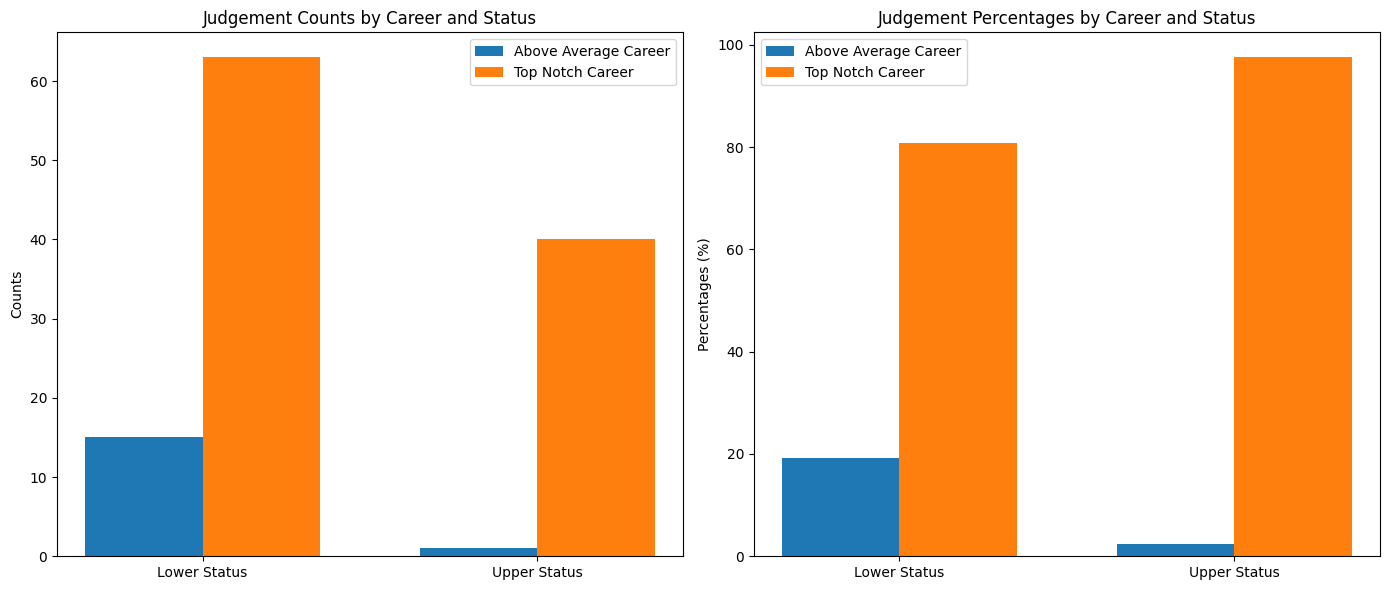

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data for counts
categories = ['Lower Status', 'Upper Status']
above_average_counts = [15, 1]
top_notch_counts = [63, 40]

# Data for percentages
above_average_percent = [19.230769, 2.439024]
top_notch_percent = [80.769231, 97.560976]

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for counts
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax1.bar(x - width/2, above_average_counts, width, label='Above Average Career')
rects2 = ax1.bar(x + width/2, top_notch_counts, width, label='Top Notch Career')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Counts')
ax1.set_title('Judgement Counts by Career and Status')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()

# Bar chart for percentages
rects3 = ax2.bar(x - width/2, above_average_percent, width, label='Above Average Career')
rects4 = ax2.bar(x + width/2, top_notch_percent, width, label='Top Notch Career')

ax2.set_ylabel('Percentages (%)')
ax2.set_title('Judgement Percentages by Career and Status')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend()

# Adjust layout
plt.tight_layout()

plt.show()


In [48]:
import pandas as pd
import statsmodels.api as sm

# Since the code execution state was reset, I need to reload the data
file_path = '/content/socioeconomic2.xlsx'
data = pd.read_excel(file_path)

# Preparing the data for OLS regression
# Converting the 'judgement' and 'status' to numerical values for regression analysis
# For 'judgement': 'top notch career' = 1, others = 0
# For 'status': 'upper' = 1, 'lower' = 0 (anchoring lower class)

data['judgement_numerical'] = data['judgement'].apply(lambda x: 1 if x == 'top notch career' else 0)
data['status_numerical'] = data['status'].apply(lambda x: 1 if x == 'upper' else 0)

# Independent variable: status
X = data[['status_numerical']]
# Dependent variable: judgement
y = data['judgement_numerical']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the OLS regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression results
model_summary = model.summary()
print(model_summary)

                             OLS Regression Results                            
Dep. Variable:     judgement_numerical   R-squared:                       0.055
Model:                             OLS   Adj. R-squared:                  0.047
Method:                  Least Squares   F-statistic:                     6.772
Date:                 Wed, 29 Nov 2023   Prob (F-statistic):             0.0105
Time:                         02:21:54   Log-Likelihood:                -37.525
No. Observations:                  119   AIC:                             79.05
Df Residuals:                      117   BIC:                             84.61
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8077   